# Теория

## Разделяющие границы классов
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

## Решающие списки
![](img/decision_list.PNG)

## Деревья принятия решений

Зачастую дерево решений служит обобщением опыта экспертов, средством передачи знаний будущим сотрудникам или моделью бизнес-процесса компании. Например, до внедрения масштабируемых алгоритмов машинного обучения в банковской сфере задача кредитного скоринга решалась экспертами. Решение о выдаче кредита заемщику принималось на основе некоторых интуитивно (или по опыту) выведенных правил, которые можно представить в виде дерева решений.
![](https://habrastorage.org/files/194/9b6/ae9/1949b6ae97ab4fc9b1a37fbf182eda8f.gif)


## Добавление правил. Критерий информативности

**Очевидный** - p-n

**Энтропийный критерий** - $S = -\Sigma_{i=1}^Np_ilog_2p_i$

**Критерий Джини** - $Gini = -\Sigma_{i=1}^Np_i(1 - p_i)$

**Критерий бустинга** - $\sqrt{p} - \sqrt{n}$

**Нормированный критерий бустинга** - $\sqrt{{p}\over{P}} - \sqrt{{n}\over{N}}$

**Дисперсия** (для регрессии) - $D = {{1}\over{l}}\Sigma_{i=1}^l(y_i-{{1}\over{l}}\Sigma_{i=1}^ly_i)^2$

## Энтропия

Для иллюстрации того, как энтропия поможет определить хорошие признаки для построения дерева, приведем тот же игрушечный пример, что в статье [Энтропия и деревья принятия решений](https://habrahabr.ru/post/171759/). Будем предсказывать цвет шарика по его координате. Конечно, ничего общего с бизнес-задачами это не имеет, но позволяет наглядно показать, как энтропия используется для построения дерева решений.
![](https://habrastorage.org/files/c96/80a/a4b/c9680aa4babc40f4bbc8b3595e203979.png)
Здесь 9 синих шариков и 11 желтых. Если мы наудачу вытащили шарик, то он с вероятностью $p_1={9}\over{20}$ будет синим и с вероятностью $p_2={11}\over{20}$ – желтым. Значит, энтропия состояния $S_0=−{{9}\over{20}}log_2{⁡{9}\over{20}}−{{11}\over{20}}log_2{⁡{11}\over{20}}\approx1$. Само это значение пока ни о чем нам не говорит. Теперь посмотрим, как изменится энтропия, если разбить шарики на две группы – с координатой меньше либо равной 12 и больше 12.
![](https://habrastorage.org/files/186/444/a8b/186444a8bd0e451c8324ca8529f8d4f4.png)
В левой группе оказалось 13 шаров, из которых 8 синих и 5 желтых. Энтропия этой группы равна $S_1=−{{5}\over{13}}log_2{{⁡5}\over{13}}−{{8}\over{13}}log_2⁡{{8}\over{13}}\approx0.96$. В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы равна $S_2=−{{1}\over{7}}log_2⁡{{1}\over{7}}−{{6}\over{7}}log_2{{⁡6}\over{7}}\approx0.6$. Как видим, энтропия уменьшилась в обеих группах по сравнению с начальным состоянием, хоть в левой и не сильно. Поскольку энтропия – по сути степень хаоса (или неопределенности) в системе, уменьшение энтропии называют приростом информации. Формально прирост информации (information gain, IG) при разбиении выборки по признаку Q (в нашем примере это признак "x≤12") определяется как
$$IG(Q)=S_0-\Sigma_{i=1}^q{{N_i}\over{N}}S_i$$
где $q$ – число групп после разбиения, $N_i$ – число элементов выборки, у которых признак Q имеет i-ое значение. В нашем случае после разделения получилось две группы (q=2) – одна из 13 элементов ($N_1=13$), вторая – из 7 ($N_2=7$). Прирост информации получился
$$IG(x\leq12) = S_0 - {{13}\over{20}}S_1 - {{7}\over{20}}S_2 \approx 0.16$$
Получается, разделив шарики на две группы по признаку "координата меньше либо равна 12", мы уже получили более упорядоченную систему, чем в начале. Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.
![](https://habrastorage.org/files/dae/a88/2b0/daea882b0a8e4ef4b23325c88f0353a1.png)
Для правой группы потребовалось всего одно дополнительное разбиение по признаку "координата меньше либо равна 18", для левой – еще три. Очевидно, энтропия группы с шариками одного цвета равна 0 $(log_2⁡1=0)$, что соответствует представлению, что группа шариков одного цвета – упорядоченная.
В итоге мы построили дерево решений, предсказывающее цвет шарика по его координате. Отметим, что такое дерево решений может плохо работать для новых объектов (определения цвета новых шариков), поскольку оно идеально подстроилось под обучающую выборку (изначальные 20 шариков). Для классификации новых шариков лучше подойдет дерево с меньшим числом "вопросов", или разделений, пусть даже оно и не идеально разбивает по цветам обучающую выборку. Эту проблему, переобучение, мы еще рассмотрим далее.

## Пример 1 (Классификация)
Предположим, мы решаем задачу бинарной классификации. Как будет выглядеть решение для линейного классификатора?
![](https://habrastorage.org/files/987/707/6e8/9877076e87ac410b8e40eedc77a17a99.png)
Как будет выглядеть граница для дерева?
![](https://habrastorage.org/files/560/d97/0ca/560d970caaf749fda34bd8417160ed7e.png)
Как будет выглядеть само дерево?
![](https://habrastorage.org/files/bf1/1fe/490/bf11fe49088f428996a27b0d2d2a6592.png)

## Пример 2 (регрессия)
![](https://habrastorage.org/files/856/c8b/9ad/856c8b9ad9094250a9d23e91e6f74e97.png)

## Готовые реализации
[sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

**Параметры:**
* *max_depth* – максимальная глубина дерева
* *max_features* — максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
* *min_samples_leaf* – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов

# Практика
**Задание:** Используя [данные](https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv) о кредитных займах, обучите DecisionTreeClassifier с наилучшими на Ваш вглзяд параметрами. Сравните полученное качество с результатами прошлого домашнего задания

In [1]:
import warnings
warnings.filterwarnings('ignore') # фильтр красных предупреждений

import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv') # прочитаем данные
data = data[data['Status'] > 0] # выкинем объекты с нулевым кредитным статусом
X, y = data.drop('Status', 1), data['Status'] # качестве объёктов-признаков возьмём всё кроме статуса заёмщика. Последний возьмём в качестве целевой переменной

y -= 1 # чтобы привести метки классов к бинарному интервалу

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

from sklearn.grid_search import GridSearchCV
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5, 10)),
    'max_features': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.0],
    'min_samples_leaf': list(range(3, 20))
}
gs = GridSearchCV(clf, params_grid, scoring='roc_auc', verbose=1)
gs.fit(X_train, y_train)

clf = gs.best_estimator_

/home/artem/anaconda3/envs/pytorch_3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/artem/anaconda3/envs/pytorch_3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   24.9s finished


In [2]:
from sklearn.metrics import accuracy_score

# Logistic regression accuracy: 78.45%
# SVM accuracy: 79.24%
print('Decision tree accuracy: %.2f%%' % (100 * accuracy_score(clf.predict(X_test), y_test)))

Decision tree accuracy: 75.98%


Построим ROC-кривую

ROC AUC: 0.770099


Text(0,0.5,'Threshold')

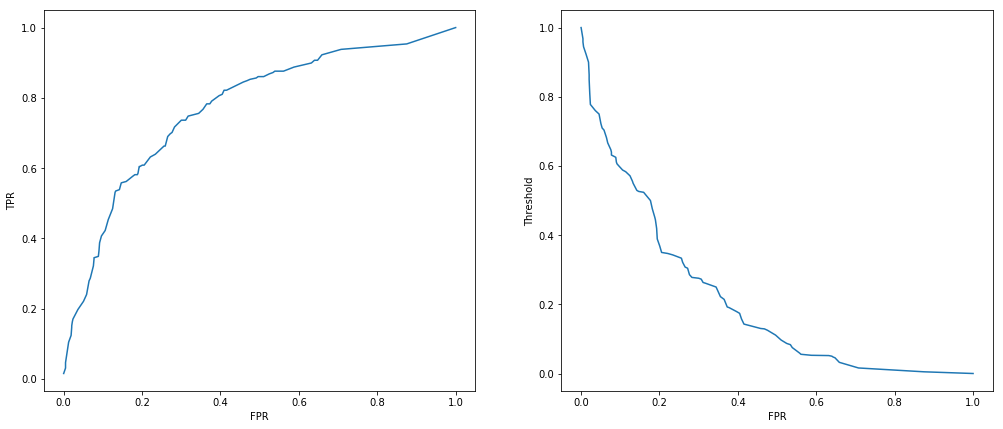

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % roc_auc)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(17,7))
plt.subplot(121)
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR');
plt.subplot(122)
plt.plot(fpr, thresholds)
plt.xlabel('FPR')
plt.ylabel('Threshold')

## Экспорт графа

Установим библиотеки для рендеринга деревьев

In [5]:
!pip install pydot
!pip install graphviz

Экспортируем дерево в файл

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='./tree.dot', filled=True, feature_names=X.columns)

Далее скопируйте содержимое этого файла [сюда](http://webgraphviz.com) и получите картинку с полученным Вами деревом. Согласуется ли такая логика дерева с Вашими ожиданиями?

# Регрессия

In [7]:
import pandas as pd
df = pd.read_csv('data/weatherHistory.csv')
df.head()

X = df.drop(['Formatted Date', 'Temperature (C)'], axis=1)
y = df['Temperature (C)']

X.head()

embedings = {}
for col in ['Precip Type', 'Daily Summary', 'Summary']:
    embedings[col] = {val:i for i, val in enumerate(X[col].unique())}
X.replace(embedings, inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# from utils import LabelTransformer
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.9999062349803247

In [12]:
X.shape

(96453, 10)

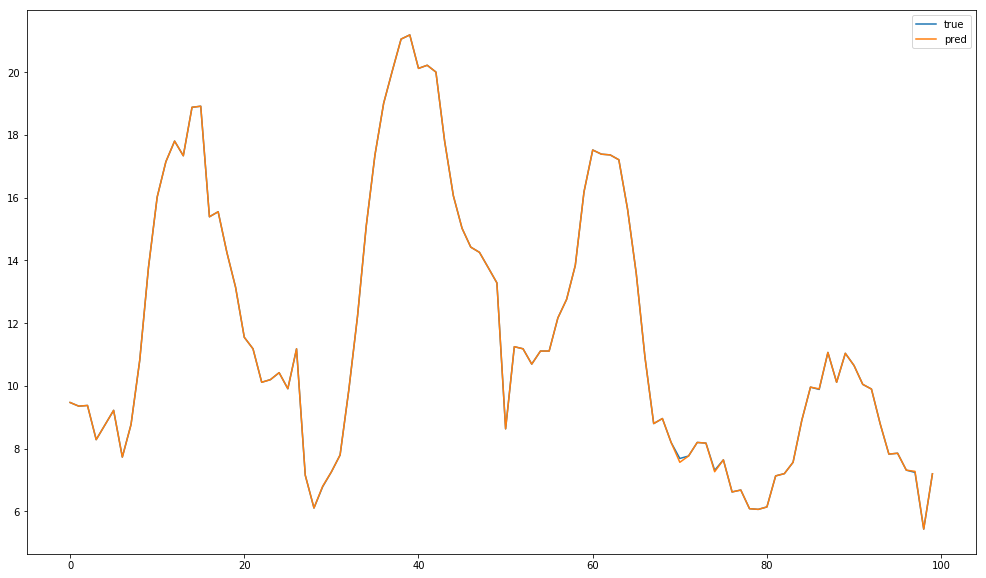

In [11]:
y_pred = model.predict(X)
plt.figure(figsize=(17,10))
plt.plot(y[:100], label='true')
plt.plot(y_pred[:100], label='pred')
plt.legend();

# Полезные ссылки
* [Ещё раз про деревья, KNN и кросс-валидацию](https://habrahabr.ru/company/ods/blog/322534/)
* [Энтропия и деревья принятия решений](https://habrahabr.ru/post/171759/)
* [Видеолекция Воронцова](https://www.youtube.com/watch?v=qk-9KHobGHA&list=PLJOzdkh8T5kp99tGTEFjH_b9zqEQiiBtC&index=3)